In [3]:
#import the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import dist
import seaborn as sns

def pixel_to_image(pixel_value):

  test_in = pd.read_csv("/content/sample_data/data/test_in.csv",index_col=None)

  im = test_in.iloc[0].values.reshape((16,16))
  plt.imshow(im)

def no_index_read():
    def func(input:str):
        return pd.read_csv(input,index_col=None)
    return func
read_csv = no_index_read()
test_in = read_csv("test_in.csv")
test_out = read_csv("test_out.csv")
train_in = read_csv("train_in.csv")
train_out = read_csv("train_out.csv")


In [4]:
from sklearn.preprocessing import MinMaxScaler
def make_one_hot(y, output_classes):
  one_hot = np.zeros((y.shape[0], output_classes))
  one_hot[np.arange(y.shape[0]), y] = 1

  return one_hot

def scale_values(data):
  scaler = MinMaxScaler()
  X = scaler.fit_transform(data)
  return X


Train = train_in.apply(lambda row: np.append(row.values, 1), axis=1)
Train = pd.DataFrame(Train.tolist())
#X = scale_values(Train.values)
X = Train.values
input_features_size = (Train.values[0].shape)[0]
targets = train_out.values.flatten()

digits = sorted(list(set(targets)))


no_classes = len(digits)
Y_true = make_one_hot(targets, no_classes)

Test = test_in.apply(lambda row: np.append(row.values, 1), axis=1)
Test = pd.DataFrame(Test.tolist())
X_test = Test.values
Y_test = test_out.values.flatten()
Y_test_true = make_one_hot(Y_test, no_classes)



In [10]:

W = np.random.randn(input_features_size, no_classes) * 0.01
losses = []
test_losses = []
learning_rate = 0.1
max_epochs = 1000
total_error = 0


#X = scale_values(Train.values)

In [11]:

def calculate_error(Y_pred, Y_true):

  Error = Y_pred - Y_true

  return Error
def compute_gradient(X, Error):
  gradient_W = 2* np.dot(X.T , Error)
  return gradient_W

def update_weights(W, gradient_W, learning_rate):
  return W - learning_rate * gradient_W


def check_test_routine(Y_test_true, X_test, W):
  Y_pred_index = np.argmax(np.dot(X_test, W), axis=1)
  Y_pred = make_one_hot(Y_pred_index, Y_test_true.shape[1])

  loss = np.mean((Y_pred - Y_test_true) ** 2)
  accuracy = np.mean(np.argmax(Y_test_true, axis=1) == np.argmax(Y_pred, axis=1))
  return loss, loss/accuracy


def train(X,W,Y_true, Y_test_true, X_test):
  avg_acc_loss_list = []
  avg_acc_test_loss = []
  
  for epoch in range(max_epochs):
    
    total_error = 0
    Y_pred_index = np.argmax(np.dot(X, W), axis=1)
    Y_pred = make_one_hot(Y_pred_index, Y_true.shape[1])
    Error = calculate_error(Y_pred, Y_true)

    gradient_W = compute_gradient(X, Error)

    W = update_weights(W, gradient_W, learning_rate)
    #Y_pred = np.dot(X, W)  # Predict outputs
    square_error = (Error) ** 2

    loss = np.mean(square_error)# Compute mean loss


    accuracy = np.mean(np.argmax(Y_true, axis=1) == np.argmax(Y_pred, axis=1))
    avg_acc_loss = loss/accuracy
    avg_acc_loss_list.append(avg_acc_loss)
    test_loss, test_avg_accuracy_loss = check_test_routine(Y_test_true, X_test, W)
    test_losses.append(test_loss)
    avg_acc_test_loss.append(test_avg_accuracy_loss)
    

    losses.append(loss)

          # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}/{max_epochs}, Loss: {loss:.4f}")
    if loss == 0:
      break
    

  return W, losses, avg_acc_loss_list, avg_acc_test_loss, test_losses

W, losses, avg_acc_loss_list, avg_acc_test_loss, test_losses = train(X,W,Y_true, Y_test_true, X_test)


Epoch 1/1000, Loss: 0.1902
Epoch 11/1000, Loss: 0.0297
Epoch 21/1000, Loss: 0.0109
Epoch 31/1000, Loss: 0.0074
Epoch 41/1000, Loss: 0.0066
Epoch 51/1000, Loss: 0.0048
Epoch 61/1000, Loss: 0.0029
Epoch 71/1000, Loss: 0.0029
Epoch 81/1000, Loss: 0.0016
Epoch 91/1000, Loss: 0.0014
Epoch 101/1000, Loss: 0.0012
Epoch 111/1000, Loss: 0.0023
Epoch 121/1000, Loss: 0.0002
Epoch 131/1000, Loss: 0.0007
Epoch 141/1000, Loss: 0.0005
Epoch 151/1000, Loss: 0.0018
Epoch 161/1000, Loss: 0.0008
Epoch 171/1000, Loss: 0.0001
Epoch 181/1000, Loss: 0.0009
Epoch 191/1000, Loss: 0.0007
Epoch 201/1000, Loss: 0.0012
Epoch 211/1000, Loss: 0.0012
Epoch 221/1000, Loss: 0.0006
Epoch 231/1000, Loss: 0.0009
Epoch 241/1000, Loss: 0.0008
Epoch 251/1000, Loss: 0.0007
Epoch 261/1000, Loss: 0.0011
Epoch 271/1000, Loss: 0.0002
Epoch 281/1000, Loss: 0.0001


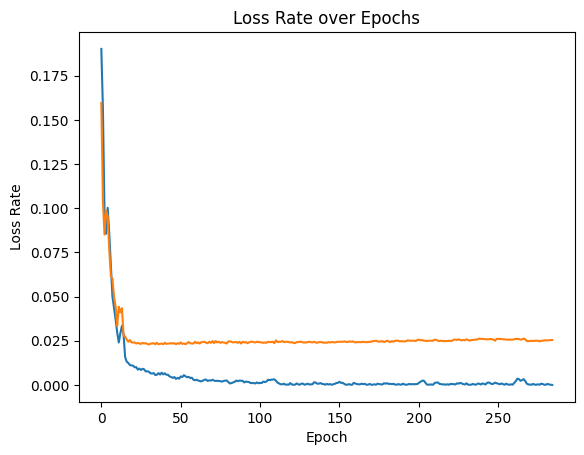

In [12]:
plt.plot(losses)
plt.plot(test_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss Rate')
plt.title('Loss Rate over Epochs')
plt.show()

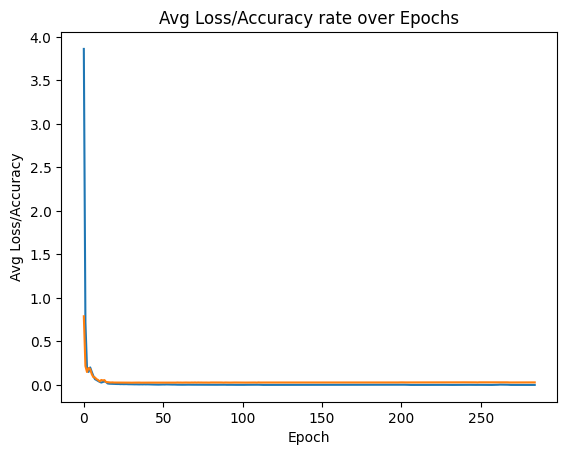

In [13]:
plt.plot(avg_acc_loss_list)
plt.plot(avg_acc_test_loss)

plt.xlabel('Epoch')
plt.ylabel('Avg Loss/Accuracy')
plt.title('Avg Loss/Accuracy rate over Epochs')
plt.show()

In [18]:
Test = test_in.apply(lambda row: np.append(row.values, 1), axis=1)
Test = pd.DataFrame(Test.tolist())
X_test = Test.values
Y_test = test_out.values.flatten()
Y_test_true = make_one_hot(Y_test, no_classes)



In [19]:
accuracy_list = []
def predict_output(X_test, Y_test, model_weights):
    correct_predictions = 0
    predictions = []

    for i in range(X_test.shape[0]):
      dot_product = np.dot(X_test[i], model_weights)
      y_pred = np.argmax(dot_product)
      predictions.append(y_pred)
      #print(f"Target value is {test_targets[i]} and Predicted value is {y_pred}")

      if y_pred == Y_test[i]:
        correct_predictions+=1

    accuracy = (correct_predictions / X_test.shape[0])*100
    accuracy_list.append(accuracy)

    return accuracy, predictions

accuracy, predictions = predict_output(X_test, Y_test, W)

In [20]:
accuracy

86.38638638638638